In [2]:
g = {
    0: [1, 2, 3],
    1: [0, 4],
    2: [0, 4],
    3: [0, 5],
    4: [5],
    5: [4, 6, 7],
    6: [],
    7: []
}

## Depth-first Search

In [6]:
# Recursive
def dfs(g:dict, node:Hashable)->None:
    print("Visting", node)
    visited[node] = True
    for v in g[node]:
        if not visited[v]:
            dfs(g,v)
            

In [7]:
visited = [ False ] * len(g) #initiate when start a new search;
dfs(g,3)

Visting 3
Visting 0
Visting 1
Visting 4
Visting 5
Visting 6
Visting 7
Visting 2


In [12]:
def dfs_stack(g:dict, node:Hashable)-> list[bool]:
    stack=[]
    visited=[False] *len(g)
    
    stack.append(node)
    while len(stack)!=0:
        print("Stack",stack)
        last_node=stack.pop()
        print("Visiting",last_node)
        visited[last_node] =True
        for v in g[last_node]:
            if not visited[v]:
                stack.append(v)
    return visited
                
    

In [13]:
dfs_stack(g,3)

Stack [3]
Visiting 3
Stack [0, 5]
Visiting 5
Stack [0, 4, 6, 7]
Visiting 7
Stack [0, 4, 6]
Visiting 6
Stack [0, 4]
Visiting 4
Stack [0]
Visiting 0
Stack [1, 2]
Visiting 2
Stack [1]
Visiting 1


[True, True, True, True, True, True, True, True]

In [21]:
def dfs_nd_stack(g:dict, node:Hashable)->list[bool]:
    stack = []
    visited = [False] *len(g)
    in_stack = [False]*len(g)
    
    stack.append(node)
    in_stack[node] = True
    
    while len(stack)!=0:
        print("Stack", stack)
        last_node = stack.pop()
        in_stack[last_node] =False
        print("Visiting",last_node)
        visited[last_node]=True
        for v in g[last_node]:
            if not visited[v] and not in_stack[v]:
                stack.append(v)
                in_stack[v] = True
    return visited

In [15]:
g2 = {
    0: [1, 2, 3],
    1: [0, 4],
    2: [0],
    3: [0, 5],
    4: [1, 5],
    5: [3, 4, 6, 7],
    6: [5],
    7: [5]
}

In [16]:
dfs_stack(g2,3)

Stack [3]
Visiting 3
Stack [0, 5]
Visiting 5
Stack [0, 4, 6, 7]
Visiting 7
Stack [0, 4, 6]
Visiting 6
Stack [0, 4]
Visiting 4
Stack [0, 1]
Visiting 1
Stack [0, 0]
Visiting 0
Stack [0, 2]
Visiting 2
Stack [0]
Visiting 0


[True, True, True, True, True, True, True, True]

In [22]:
dfs_nd_stack(g2,3)

Stack [3]
Visiting 3
Stack [0, 5]
Visiting 5
Stack [0, 4, 6, 7]
Visiting 7
Stack [0, 4, 6]
Visiting 6
Stack [0, 4]
Visiting 4
Stack [0, 1]
Visiting 1
Stack [0]
Visiting 0
Stack [2]
Visiting 2


[True, True, True, True, True, True, True, True]

## Breadth-first Search

In [1]:
from collections import deque
from typing import Hashable

def bfs(g: dict, node: Hashable) -> list[bool]:
    q= deque()
    
    visited =[False] * len(g)
    inqueue = [False] * len(g)
    
    q.appendleft(node)
    inqueue[node] = True
    
    while len(q)!=0:
        print("Queue",q)
        c = q.pop()
        print('Visiting',c)
        inqueue[c] = False
        visited[c] =True
        for v in g[c]:
            if not visited[v] and not inqueue[v]:
                q.appendleft(v)
                inqueue[v] =True
    return visited

In [3]:
bfs(g,3)

Queue deque([3])
Visiting 3
Queue deque([5, 0])
Visiting 0
Queue deque([2, 1, 5])
Visiting 5
Queue deque([7, 6, 4, 2, 1])
Visiting 1
Queue deque([7, 6, 4, 2])
Visiting 2
Queue deque([7, 6, 4])
Visiting 4
Queue deque([7, 6])
Visiting 6
Queue deque([7])
Visiting 7


[True, True, True, True, True, True, True, True]

## Reading nodes from txt files

In [11]:
input_filename = "example_graph_2.txt"

g={}
with open(input_filename) as graph_input:
    for line in graph_input:
        nodes =[int(x) for x in line.split()]
        if len(nodes)!=2:
            continue
        if nodes[0] not in g:
            g[nodes[0]]=[]
        if nodes[1] not in g:
            g[nodes[1]]= []
        g[nodes[0]].append(nodes[1]) ## Direct graphs
        g[nodes[1]].append(nodes[0]) ## Undirect Grahps if add this line
print(g)

{0: [1, 2, 3], 1: [0, 4], 2: [0], 3: [0, 5], 4: [1, 5], 5: [3, 4, 6, 7], 6: [5], 7: [5]}


In [12]:
import pprint
pprint.pprint(g)

{0: [1, 2, 3],
 1: [0, 4],
 2: [0],
 3: [0, 5],
 4: [1, 5],
 5: [3, 4, 6, 7],
 6: [5],
 7: [5]}


## Using Networkx Lib

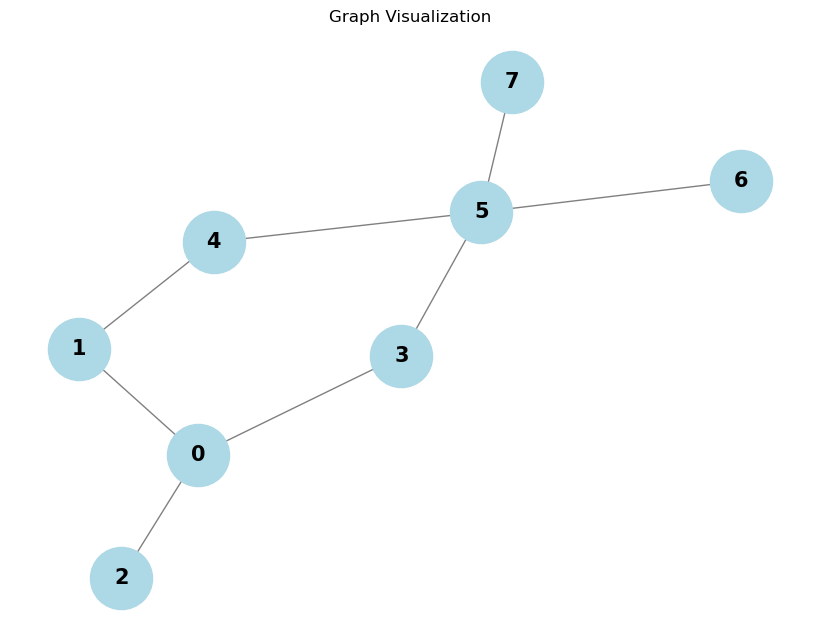

In [13]:
import networkx as nx
import  matplotlib.pyplot as plt

G=nx.Graph()

for node, neighbors in g.items():
    for neighbor in neighbors:
        G.add_edge(node,neighbor)

plt.figure(figsize=(8,6))
nx.draw(G,with_labels=True, node_color='lightblue', edge_color='gray',node_size=2000,font_size=15,font_weight='bold')
plt.title("Graph Visualization")
plt.show()
